<a href="https://colab.research.google.com/github/lucabmanning/563-luca/blob/main/luca_lattice_mc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3: Monte Carlo Code

**Python notebook that:**
1.   Can perform NVT simulations of square-lattice particles.
2.   Obeys detailed balance.
3. Uses periodic boundary conditions.
4.   Demonstrates a temperature below which you observe particles clustering together.
5.   Includes some measurements of which system sizes are too large to be practical on google colab.



---



"Notes" From Class:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random

# GRID
class Grid():
# needs a size and have particles that sit in it
# a helper function that gives me neighbors of a site will be helpful
# grid class defines a blueprint for creating objects representing the
    # simulation grid.
    def __init__(self,L,N):
# def will define a new function
# the two underscores before and after init means dunder?
# __init__ is a special method called the constructor.
#  It's executed automatically when you create a new Grid object.
        self.sites = np.zeros((L,L)) # Use np.zeros instead of numpy.zeros
# need to put N particles in the system
        self.N = N
# stores the number of particles in the grid object
        self.particles = []
# initializes empty list to store particle objects
        # The for loop was outside the __init__ method
        # Indenting it to be part of the __init__ method
        for i in range(self.N):
            self.particles.append(particle(self))
            self.particles[-1].location = [0,0]
        # self.lattice = np.random.choice([-1, 1], size=(L, L))

    def display(self):
        plt.imshow(self.lattice, cmap='gray')
        plt.axis('off')
        plt.show()

# PARTICLES
class particle():
# Calculate distances
    def __init__(self,system):
      self.system = system
      self.location = [0,0]

    def get_neighbors(self):
      for d in [ (1,0), (0,-1), (-1,0), (0,1)]:
  #up, down, left, right
        new_location = [self.location[0] + d[0], self.location[1] + d[1]]
        print (d + tuple(self.location))
# Alternatively, convert d to a list:
        # print(list(d) + self.location)

# CALCULATE ENERGY OF A CONFIGURATION (microstate)
    def calculate_energy(self):
        energy = 0
        for particle in self.particles:
            x, y = particle.location
            for dx, dy in [(1, 0), (0, 1)]:  # Check neighbors to the right and down
                nx, ny = (x + dx) % self.sites.shape[0], (y + dy) % self.sites.shape[1]  # Periodic boundary conditions
                neighbor = self.find_particle_at_location([nx, ny]) #Find particle at the neighbor location
                if neighbor:
                    energy -= particle.spin * neighbor.spin  # Ising-like interaction
        return energy/2 #Avoid double counting

    def find_particle_at_location(self, location):
        for particle in self.particles:
            if particle.location == location:
                return particle
        return None #If location is empty

Homework:

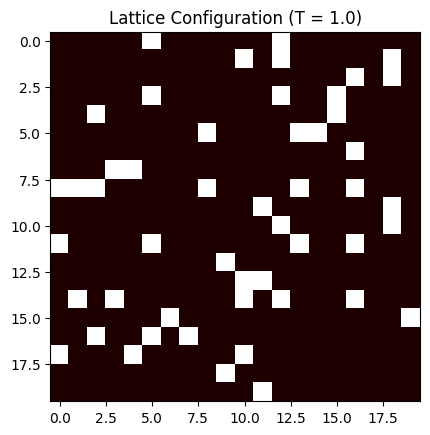

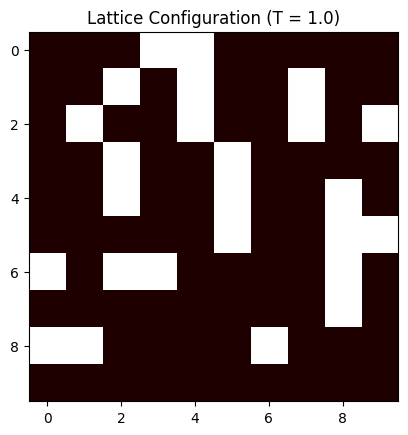

Size 10x10 ran successfully.


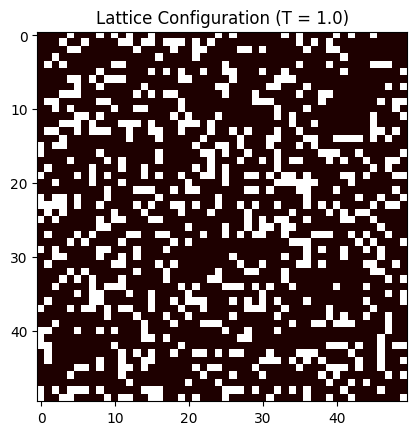

Size 50x50 ran successfully.


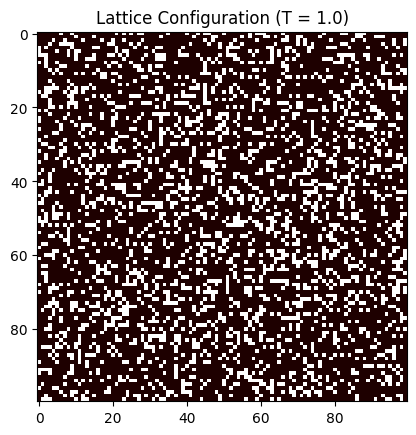

Size 100x100 ran successfully.


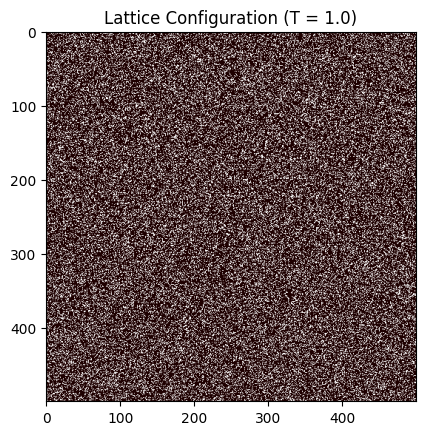

Size 500x500 ran successfully.


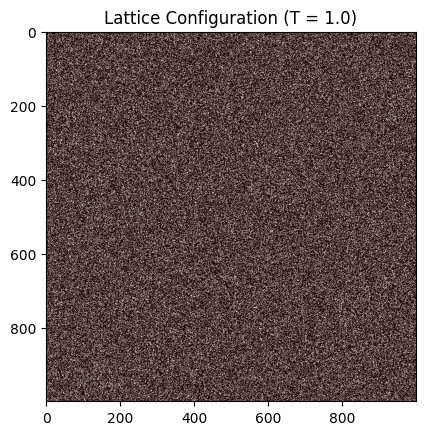

Size 1000x1000 ran successfully.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random

# GRID
class Grid:
    def __init__(self, L, N, T):
        self.L = L  # Grid size
        self.N = N  # Number of particles
        self.T = T  # Temperature
        self.sites = np.zeros((L, L), dtype=int)  # Lattice grid initialized to empty
        self.particles = []  # List of particles

        # Place particles randomly
        placed = 0
        while placed < N:
            x, y = np.random.randint(0, L, size=2)
            if self.sites[x, y] == 0:  # Only place if the site is empty
                self.sites[x, y] = 1
                self.particles.append(Particle(x, y))
                placed += 1

    def display(self):
        plt.imshow(self.sites, cmap='grey', origin='upper')
        plt.title(f"Lattice Configuration (T = {self.T})")
        plt.show()

    def calculate_energy(self):
        energy = 0
        for p in self.particles:
            x, y = p.x, p.y
            for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:  # Nearest neighbors
                nx, ny = (x + dx) % self.L, (y + dy) % self.L  # Periodic BC
                if self.sites[nx, ny] == 1:
                    energy -= 1
        return energy / 2  # Avoid double counting

    def metropolis_step(self):
        p = random.choice(self.particles)  # Choose a random particle
        x_old, y_old = p.x, p.y
        dx, dy = random.choice([(1, 0), (-1, 0), (0, 1), (0, -1)])  # Random move
        x_new, y_new = (x_old + dx) % self.L, (y_old + dy) % self.L

        if self.sites[x_new, y_new] == 0:  # If site is empty, move particle
            delta_E = self._delta_energy(x_old, y_old, x_new, y_new)
            if delta_E < 0 or np.random.rand() < np.exp(-delta_E / self.T):
                self.sites[x_old, y_old] = 0
                self.sites[x_new, y_new] = 1
                p.x, p.y = x_new, y_new

    def _delta_energy(self, x_old, y_old, x_new, y_new):
        delta_E = 0
        for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            nx_old, ny_old = (x_old + dx) % self.L, (y_old + dy) % self.L
            nx_new, ny_new = (x_new + dx) % self.L, (y_new + dy) % self.L
            if self.sites[nx_old, ny_old] == 1:
                delta_E += 1  # Breaking old bonds
            if self.sites[nx_new, ny_new] == 1:
                delta_E -= 1  # Forming new bonds
        return delta_E

    def run_simulation(self, steps=10000):
        for _ in range(steps):
            self.metropolis_step()
        self.display()

# PARTICLES
class Particle:
    def __init__(self, x, y):
        self.x = x
        self.y = y

# SYSTEM SIZE TESTING ON GOOGLE COLAB
def test_system_sizes():
    sizes = [10, 50, 100, 500, 1000]  # Different grid sizes
    for L in sizes:
        try:
            grid = Grid(L, N=L**2//4, T=1.0)  # Partially filled grid
            grid.run_simulation(steps=100)
            print(f"Size {L}x{L} ran successfully.")
        except MemoryError:
            print(f"Size {L}x{L} is too large for Google Colab.")
        except Exception as e:
            print(f"Size {L}x{L} failed with error: {e}")

# I can get over 5000 x 5000, but it takes several minutes to load I could not
# get error messages programmed above indicating failure, but I got an error
# message specifically from google colab.
# With these simulations below I can observe particle clusters for sure

# MAIN EXECUTION
grid = Grid(L=20, N=50, T=1.0)
grid.run_simulation(steps=10000)

test_system_sizes()

The notification below appeared after around 5-10 min when attempting to load a 10,000 x 10,000 lattice particle simulation.

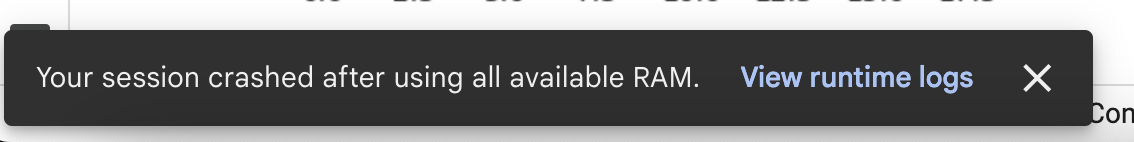